In [40]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
import matplotlib.dates as dates
import datetime
import time
import csv

In [2]:
%%time
df_tick_data = pd.read_csv('C:\\Users\\pebaqu\\Downloads\\USDJPY-2018-01.csv', parse_dates=True )
df_tick_data['TTime']=df_tick_data['TTime'].apply(
    lambda x: np.datetime64(datetime.datetime.strptime(x, '%Y%m%d %H:%M:%S.%f'),unit = 'ms'))

Wall time: 52.8 s


In [12]:
%%time
from IPython.display import display
pd.options.display.max_columns = None

#Sort dataframe on date
df_tick_data_sorted=df_tick_data.sort_values(by=['TTime'])
df_tick_data_sorted.set_index('TTime')
df_tick_data_sorted['TID'] = range(0, len(df_tick_data_sorted))
df_tick_data_sorted['Bid_Ask_Spread']=df_tick_data_sorted['Bid'] - df_tick_data_sorted['Ask']
#display(df_tick_data_sorted.rolling(20, on=['Bid_Ask_Spread']))
display(df_tick_data_sorted)
print("Process time:",time.process_time())
#display(df_tick_data_sorted.index)
#Add date key

TypeError: unhashable type: 'list'

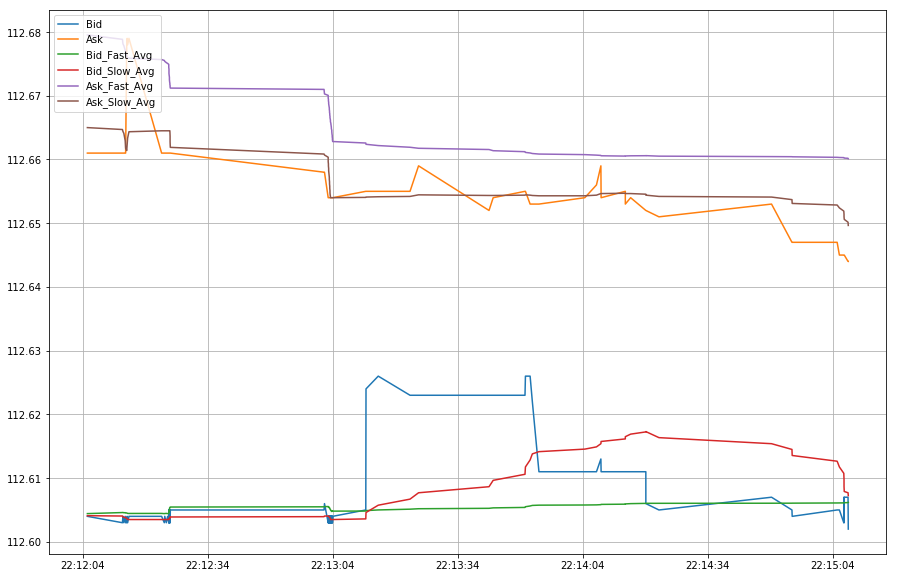

In [47]:
df_tick_data_sorted.index = df_tick_data_sorted['TTime']
#display(df_tick_data_sorted)

df_analysis=pd.DataFrame(df_tick_data_sorted)
#display(df_analysis)
#print(df_analysis.type())
df_analysis['Bid_Fast_Avg']=df_analysis.Bid.rolling(200).mean()
df_analysis['Bid_Slow_Avg']=df_analysis.Bid.rolling(20).mean()
df_analysis['Ask_Fast_Avg']=df_analysis.Ask.rolling(200).mean()
df_analysis['Ask_Slow_Avg']=df_analysis.Ask.rolling(20).mean()
df_analysis['Spread_Fast_Avg']=df_analysis.Bid_Ask_Spread.rolling(200).mean()
df_analysis['Spread_Slow_Avg']=df_analysis.Bid_Ask_Spread.rolling(20).mean()
df_analysis_final=df_analysis.dropna().head(100)
#display(df_analysis_final)
plt.figure(figsize=(15,10))
plt.grid(True)
plt.plot(df_analysis_final['Bid'], label='Bid')
plt.plot(df_analysis_final['Ask'], label='Ask')
plt.plot(df_analysis_final['Bid_Fast_Avg'], label='Bid_Fast_Avg')
plt.plot(df_analysis_final['Bid_Slow_Avg'], label='Bid_Slow_Avg')
plt.plot(df_analysis_final['Ask_Fast_Avg'], label='Ask_Fast_Avg')
plt.plot(df_analysis_final['Ask_Slow_Avg'], label='Ask_Slow_Avg')
#plt.plot(df_analysis_final['Spread_Fast_Avg'], label='Spread_Fast_Avg')
#plt.plot(df_analysis_final['Spread_Slow_Avg'], label='Spread_Slow_Avg')
plt.legend(loc=2)

plt.show()


#display(df_tick_data_sorted.rolling(20, on=['Bid_Ask_Spread']))

In [57]:
print("df_analysis_final is", type(df_analysis_final))

#display(df_analysis_final)

df_analysis_final is <class 'pandas.core.frame.DataFrame'>


In [62]:
account_bal = 1000
equity = 0


for index, row in df_analysis_final.iterrows():
    #display("the index is:", index, df_analysis_final.loc[index,'Bid_Fast_Avg'])
    
    
    if df_analysis_final.loc[index,'Bid_Fast_Avg'] < df_analysis_final.loc[index, 'Ask_Slow_Avg']:
        equity = (account_bal * .1) * df_analysis_final.loc[index,'Ask']
        account_bal = account_bal - (account_bal * .1)

    if df_analysis_final.loc[index,'Bid_Fast_Avg'] > df_analysis_final.loc[index,'Ask_Slow_Avg']:    
        equity = account_bal * .1 * df_analysis_final.loc[index,'Ask']
        account_bal = account_bal + (df_analysis_final.loc[index,'Ask'] * equity)
    

print ("account balance is:", account_bal, "equity is:", equity)
    


ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

In [118]:
%%time
'''Creating empty base and final arrays'''

arr_data=df_tick_data_sorted[:300000] #need to 1)find right datatype (smallest) 2)optimize structure, and 3)determine memory usage
#print(test_data)

arr_base_len=len(arr_data.index)
arr_final_len= len(arr_data.index)-1
#arr_final_len= (len(arr_data.index)*(len(arr_data.index)-1))//2


arr_base=np.zeros(arr_base_len, dtype={'names':('TID','Bid','Ask'),
                          'formats':('int','f8','f8')})

arr_final=np.zeros(arr_final_len, dtype={'names':('PTimeID','STimeID', 'PTBid','PTAsk', 'STBid', 'STAsk', 'Profit', 'SBid_Ask_Spread','PBid_Ask_Spread','Tick_Delta'),
                          'formats':('int','int', 'f8','f8','f8','f8','f8','f8','f8','int')})

print(arr_final.dtype.itemsize)
print(arr_final.nbytes)
print(arr_final)

68
20399932
[(0, 0, 0., 0., 0., 0., 0., 0., 0., 0)
 (0, 0, 0., 0., 0., 0., 0., 0., 0., 0)
 (0, 0, 0., 0., 0., 0., 0., 0., 0., 0) ...
 (0, 0, 0., 0., 0., 0., 0., 0., 0., 0)
 (0, 0, 0., 0., 0., 0., 0., 0., 0., 0)
 (0, 0, 0., 0., 0., 0., 0., 0., 0., 0)]
Wall time: 3.01 ms


In [119]:
%%time

'''This writes the dataframe to an array'''
for index, row in arr_data.iterrows():
    #print(index, test_data.loc[index,'TTime'])
    arr_base[index]=(arr_data.loc[index,'TID'], arr_data.loc[index,'Bid'],arr_data.loc[index,'Ask'])

print(arr_base.shape)
print(arr_base)
'''
print(arr_base[0])
print(arr_base[0][0])

curr_row=0
for x in range(1, 10):
    print("base row", arr_base[curr_row])
    curr_row+=1
    print("subsequent rows", arr_base[curr_row:])
'''

(300000,)
[(     0, 112.57 , 112.8  ) (     1, 112.6  , 112.8  )
 (     2, 112.614, 112.722) ... (299997, 112.796, 112.799)
 (299998, 112.795, 112.798) (299999, 112.794, 112.797)]
Wall time: 23.9 s


In [120]:
%%time
'''This is the final array (concat + PTime, STime, PPrice, SPrice, Profit). 
This is using the index logic and not go through each row.
Need to use multiprocessor.'''

y=0
curr_row=0
total_concat_rows=0
for x in np.nditer(arr_base):
    
    #set up array chunks. max tick_delta is 20343
    arr_base_subset_beg=curr_row+1
    if arr_final_len - arr_base_subset_beg >30000:
        arr_base_subset_end=arr_base_subset_beg+30000
    else:
        arr_base_subset_end = arr_final_len + 1
    
    #define arr_analysis
    arr_analysis_len = arr_base_subset_end - arr_base_subset_beg  
    arr_analysis=np.zeros(arr_analysis_len, dtype={'names':('PTimeID','STimeID', 'PTBid','PTAsk', 'STBid', 'STAsk', 'Profit', 'SBid_Ask_Spread','PBid_Ask_Spread','Tick_Delta'),
                          'formats':('int','int', 'f8','f8','f8','f8','f8','f8','f8','int')})

    if arr_analysis.shape != (0,):
        
        #populate static purchase values
        arr_analysis[['PTimeID','PTBid','PTAsk']]=arr_base[curr_row][['TID','Bid','Ask']]
        #populate subsequent transaction values
        arr_analysis[['STimeID','STBid','STAsk']] = arr_base[arr_base_subset_beg:arr_base_subset_end][['TID','Bid','Ask']]
        #arr_analysis[['Profit']]= arr_analysis['STBid'] 
        #calculate transaction metrics
        arr_analysis['Profit']=arr_analysis['STBid'] - arr_analysis['PTBid']
        arr_analysis['SBid_Ask_Spread']=arr_analysis['STBid'] - arr_analysis['STAsk']
        arr_analysis['PBid_Ask_Spread']= arr_analysis['PTBid'] - arr_analysis['PTAsk']
        arr_analysis['Tick_Delta']= arr_analysis['STimeID'] - arr_analysis['PTimeID']

        #print("this is arr_analysis", arr_analysis)

        #arr_analysis_max = arr_analysis[np.argmax(arr_analysis['Profit'])]
        #print("max profit:", arr_analysis_max)

        arr_final[curr_row] =  arr_analysis[np.argmax(arr_analysis['Profit'])]
        #print("final array:", arr_final)

        curr_row+=1

print(arr_final)

[(     0,  17184, 112.57 , 112.8  , 112.791, 112.795,  0.221, -0.004, -0.23 , 17184)
 (     1,  17184, 112.6  , 112.8  , 112.791, 112.795,  0.191, -0.004, -0.2  , 17183)
 (     2,  17184, 112.614, 112.722, 112.791, 112.795,  0.177, -0.004, -0.108, 17182)
 ...
 (299996, 299997, 112.797, 112.8  , 112.796, 112.799, -0.001, -0.003, -0.003,     1)
 (299997, 299998, 112.796, 112.799, 112.795, 112.798, -0.001, -0.003, -0.003,     1)
 (299998, 299999, 112.795, 112.798, 112.794, 112.797, -0.001, -0.003, -0.003,     1)]
Wall time: 13min 17s


In [121]:
print(np.max(arr_final['Tick_Delta']))

30000


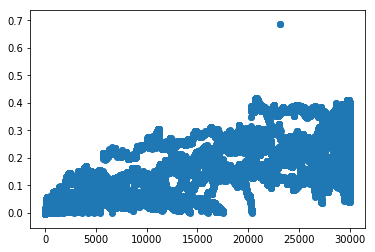

In [122]:
plt.scatter(arr_final['Tick_Delta'],arr_final['Profit'])
plt.show()

(array([    0,     1,     2, ..., 99996, 99997, 99998], dtype=int64),)


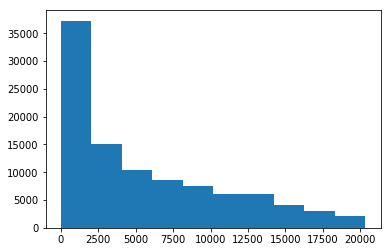

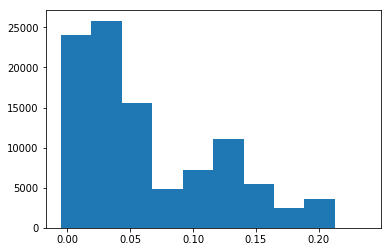

In [115]:
arr_his=np.where(arr_final['Profit']>0)
print(arr_his)
plt.hist(arr_final['Tick_Delta'])
plt.show()
plt.hist(arr_final['Profit'])
plt.show()

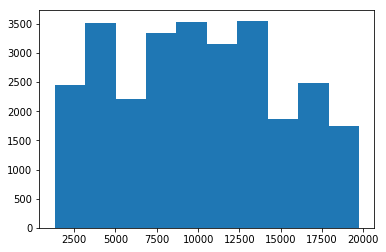

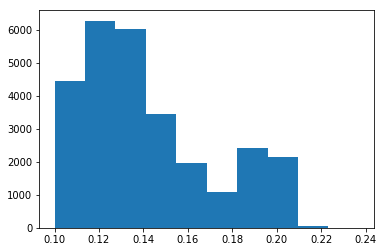

In [96]:
df_final = pd.DataFrame(arr_final)
df_final_profit=df_final[df_final['Profit']>.1]
#display(df_final[df_final['Profit']>.1])
plt.hist(df_final_profit['Tick_Delta'])
plt.show()
plt.hist(df_final_profit['Profit'])
plt.show()

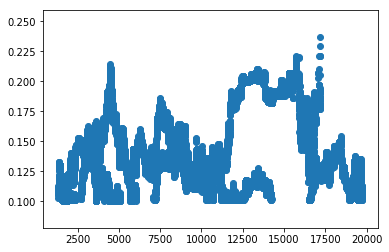

In [97]:
plt.scatter(df_final_profit['Tick_Delta'],df_final_profit['Profit'])
plt.show()

In [123]:
from scipy.stats.stats import pearsonr

print("only profit:", pearsonr(df_final_profit['Tick_Delta'],df_final_profit['Profit']))
print("entire dataset:", pearsonr(arr_final['Tick_Delta'],arr_final['Profit']))

only profit: (0.18795456933019342, 7.640619777110363e-220)
entire dataset: (0.7425525517183932, 0.0)


In [102]:
df_final_loses=df_final[df_final['Profit']<0]
display(df_final_loses)
print(sum(df_final['Profit']))

,PTimeID,STimeID,PTBid,PTAsk,STBid,STAsk,Profit,SBid_Ask_Spread,PBid_Ask_Spread,Tick_Delta
17184,17184,17185,112.791,112.795,112.790,112.794,-0.001,-0.004,-0.004,1
17185,17185,17186,112.790,112.794,112.787,112.791,-0.003,-0.004,-0.004,1
17186,17186,17187,112.787,112.791,112.786,112.790,-0.001,-0.004,-0.004,1
17188,17188,17190,112.786,112.789,112.785,112.788,-0.001,-0.003,-0.003,2
17199,17199,17200,112.785,112.789,112.784,112.789,-0.001,-0.005,-0.004,1
17208,17208,17209,112.784,112.787,112.783,112.787,-0.001,-0.004,-0.003,1
17209,17209,17211,112.783,112.787,112.782,112.786,-0.001,-0.004,-0.004,2
17211,17211,17212,112.782,112.786,112.781,112.785,-0.001,-0.004,-0.004,1
17213,17213,17214,112.781,112.784,112.780,112.784,-0.001,-0.004,-0.003,1
17217,17217,17220,112.780,112.783,112.779,112.784,-0.001,-0.005,-0.003,3


6338.000000000315
